In [1]:
import numpy as np
import matplotlib.pyplot as plt



In [2]:
def visualize_data(X,y, title):
    sorted_index = np.argsort(y, kind='stable')
    y = y[sorted_index]
    X = X[sorted_index]

    plt.figure(figsize=(20, 4))  # Increase the figure width and height

    plt.xlabel('Feature 1')

    # Define colormap for probabilities
    cmap = plt.cm.viridis

    # Add colorbar
    plt.scatter(X, np.zeros_like(X), c=y, cmap=cmap, rasterized=True, marker='|', s=5000)       
    
    plt.title(title)
    cbar = plt.colorbar()
    cbar.set_label('Predicted probabilities')
    plt.show()
    plt.close()

/Users/mhshaker/Documents/PhD/Projects/RF_ranking_calibration/RFcalib/lib/python3.11/site-packages/sklearn/model_selection/_search.py:307: UserWarning: The total space of parameters 1 is smaller than n_iter=3. Running 1 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


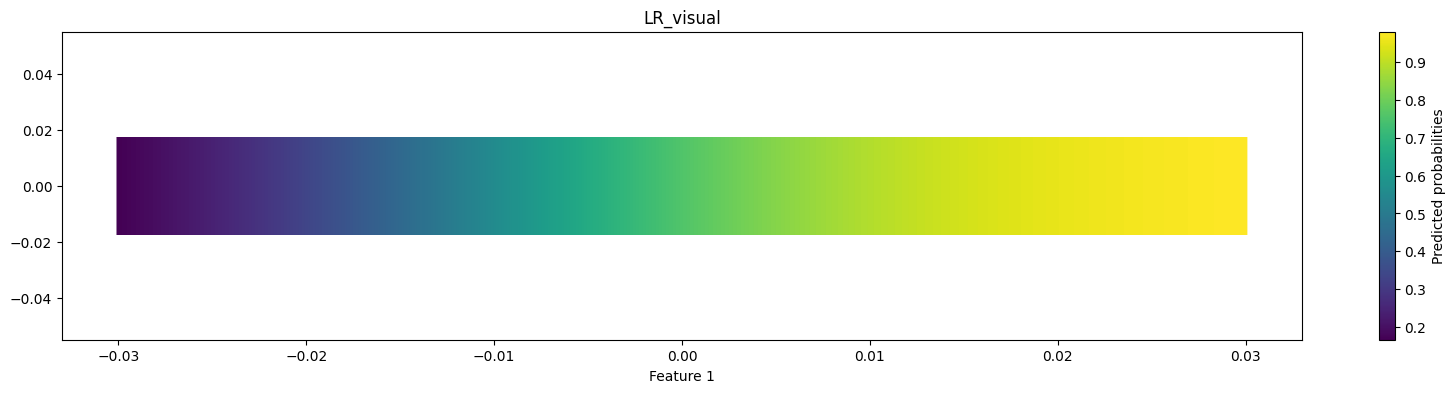

unique [0.02060696 0.02060807 0.02060917 ... 0.83316307 0.83317067 0.83317827]
counts [1 1 1 ... 1 1 1]
100000


/Users/mhshaker/Documents/PhD/Projects/RF_ranking_calibration/RFcalib/lib/python3.11/site-packages/sklearn/model_selection/_search.py:307: UserWarning: The total space of parameters 1 is smaller than n_iter=3. Running 1 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


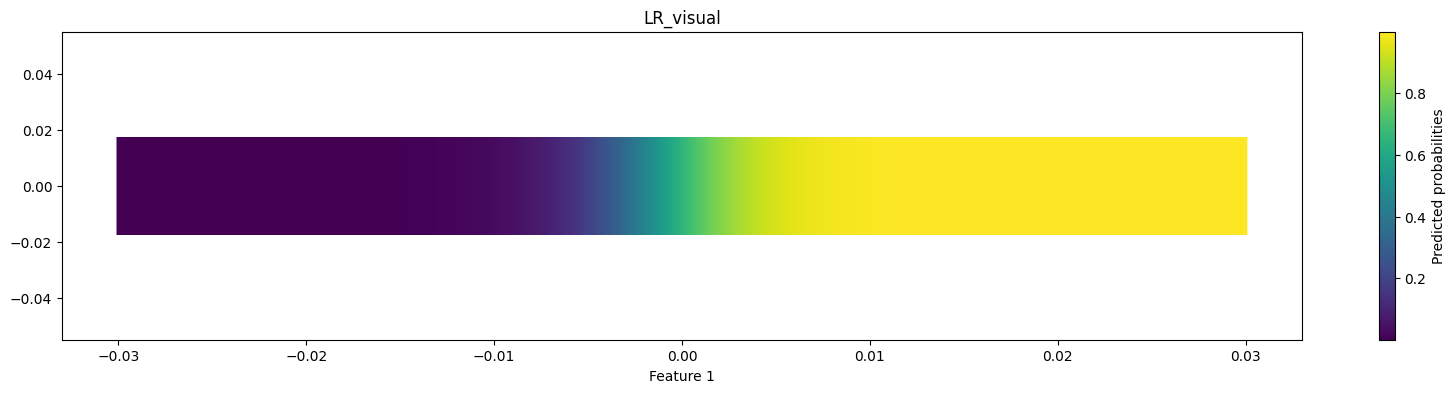

unique [2.12305780e-06 2.12358715e-06 2.12411664e-06 ... 9.99992983e-01
 9.99992985e-01 9.99992986e-01]
counts [1 1 1 ... 1 1 1]
100000


/Users/mhshaker/Documents/PhD/Projects/RF_ranking_calibration/RFcalib/lib/python3.11/site-packages/sklearn/model_selection/_search.py:307: UserWarning: The total space of parameters 1 is smaller than n_iter=3. Running 1 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


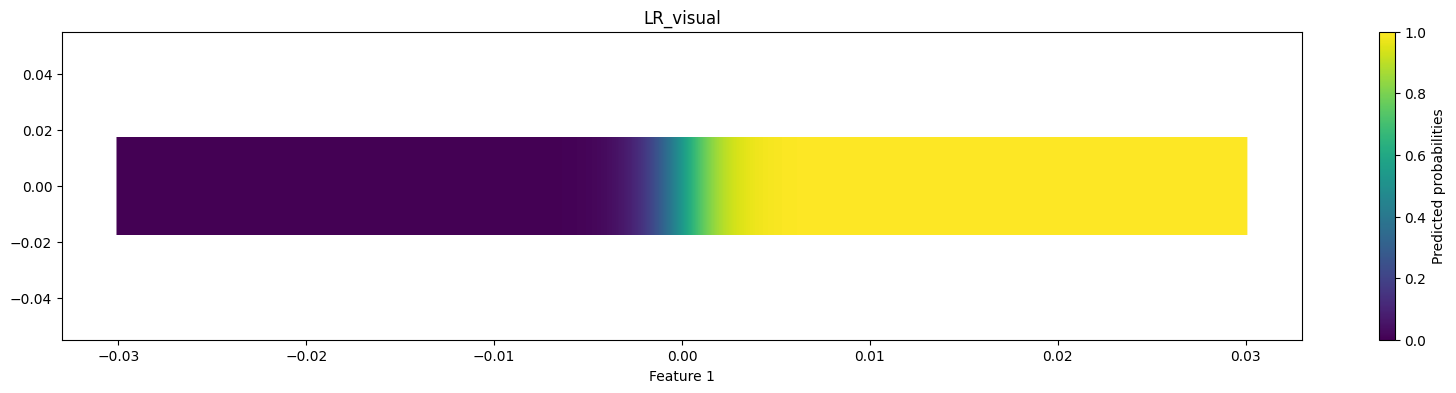

unique [2.73536749e-12 2.73692180e-12 2.73825407e-12 ... 1.00000000e+00
 1.00000000e+00 1.00000000e+00]
counts [1 1 1 ... 1 1 1]
100000


/Users/mhshaker/Documents/PhD/Projects/RF_ranking_calibration/RFcalib/lib/python3.11/site-packages/sklearn/model_selection/_search.py:307: UserWarning: The total space of parameters 1 is smaller than n_iter=3. Running 1 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


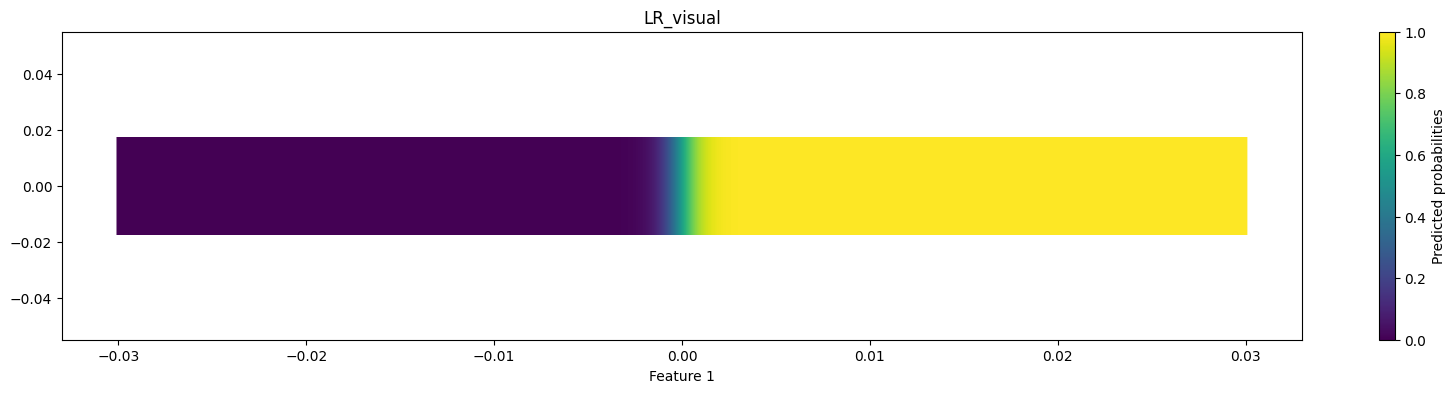

unique [0.00000000e+00 2.22044605e-16 4.44089210e-16 ... 1.00000000e+00
 1.00000000e+00 1.00000000e+00]
counts [15690  1030   479 ...   478  1030 14799]
57261


In [3]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import RandomizedSearchCV


# train RF
for exp_v in [100,1000,10000,100000]:

    np.random.seed(0)

    # make example data
    X = np.random.uniform(-1, 1, size=(exp_v))  # Example: 5x5 array
    y = (X >= 0).astype(int)
    X = X.reshape(-1, 1)

    # plt.figure(figsize=(20, 4))  # Increase the figure width and height
    # plt.scatter(X, np.zeros_like(X), c=y)
    # plt.show()
    # plt.close()
    
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, shuffle=True, random_state=0)

#     rf = RandomForestClassifier(n_estimators=100,random_state=0)
#     rf = LogisticRegression(random_state=0)

    search_space_lr = {
        # "penalty": ["l1", "l2", "elasticnet", "none"],  # Regularization type
        "C": [100000],           # Inverse of regularization strength
        # "solver": ["liblinear", "lbfgs", "saga", "newton-cg"],  # Solvers supporting the chosen penalty
        "max_iter": [1000],             # Maximum iterations for convergence
        # "class_weight": [None, "balanced"],            # Handling of imbalanced data
        # "l1_ratio": [0, 0.1, 0.5, 0.9, 1.0],           # ElasticNet mixing (only for 'elasticnet')
        # "fit_intercept": [True, False],                # Whether to include the intercept
        # "dual": [True, False],                         # Only relevant for 'liblinear' and certain data shapes
        }
    lr = LogisticRegression(random_state=0)
    rf = RandomizedSearchCV(lr, search_space_lr, scoring=["neg_brier_score"], refit="neg_brier_score", cv=5, n_iter=3, random_state=0)

    rf.fit(X_train, y_train)

    x_grid = np.linspace(-0.03, 0.03, 100000).reshape((-1, 1))
    p_grid = rf.predict_proba(x_grid)
    visualize_data(x_grid, p_grid[:,1], "LR_visual")
    u, c = np.unique(p_grid[:,0], return_counts=True)
    print("unique", u)
    print("counts", c)
    print(len(u))


In [4]:
# from sklearn.model_selection import RandomizedSearchCV

# opt_search_space = {
#                         "n_estimators": [10],
#                         "max_depth":  np.arange(1, 5).tolist(), # [None, 5, 10, 15, 20, 30, 50], #
#                         "criterion": ["gini", "entropy"],
#                         "max_features": ['sqrt', 'log2', None],
#                         "min_samples_split": [2, 5, 10],
#                         "min_samples_leaf":  [1, 2, 4],
#                         # 'bootstrap': [True, False],                # Whether bootstrap samples are used
#                         "class_weight": [None, 'balanced', 'balanced_subsample'],  # Weight for each class
#                         "oob_score": [False]
#                     }

# model = RandomForestClassifier(random_state=0)
# RS = RandomizedSearchCV(model, opt_search_space, scoring=["neg_brier_score"], refit="neg_brier_score", cv=5, n_iter=100, random_state=0)
# RS.fit(X_train, y_train.ravel())
# rf_opt = RS.best_estimator_

# p_grid = rf_opt.predict_proba(x_grid)
# visualize_data(x_grid, p_grid[:,1], "RF_visual")
# u, c = np.unique(p_grid[:,0], return_counts=True)
# print("unique", u)
# print("counts", c)